<a href="https://colab.research.google.com/github/takashinnosuke/DLstudy_matplotlib/blob/main/Introduction_to_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib 入門

グラフの描画を行う際は [Matplotlib](https://matplotlib.org/) が便利です。
Colab では標準で Matplotlib を使ってプロットを行うと描画結果がノートブック上に表示されます。
Matplotlib は `matplotlib.pyplot` を `plt` という別名をつけて読み込むのが一般的です。

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

この章で用いるデータセットは前章と同じように Colab で用意されているサンプルデータを使用します。
Colab 以外で実行する場合は、[こちら](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)からデータをダウンロードして、`sample_data` というディレクトリ以下に設置してください。

まず、Pandas で CSV ファイルを読み込みます。

In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')

## 復習：DataFrame の表示

In [ ]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

先頭の数件だけを表示

In [ ]:
#先頭から5件のみ抽出
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

特定の列を抽出したい場合は、df に対し、Python の辞書オブジェクトに行うように [] を使って取り出したい列の名前を指定します。

In [ ]:
df['longitude'].head(3)

0   -114.31
1   -114.47
2   -114.56
Name: longitude, dtype: float64

## 散布図

**散布図 (scatter)** は変数間の相関を視覚的に確認したり、データのばらつきや値の範囲を視覚的に確認するのに便利なものです。
Matplotlib では与えられた配列から散布図を作成する<br>
# `plt.scatter()` <br>
が用意されています。

まずは、`median_income` 列のデータと `median_house_value` 列のデータをそれぞれ横軸、縦軸に取った散布図を描画してみましょう。

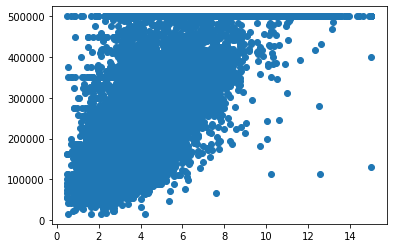

In [ ]:
#第1引数に「横軸」のdataflame，第2引数に「縦軸」のdataflame
plt.scatter(df['median_income'], df['median_house_value'])

## ヒストグラム

データ中にどのような値がよく登場しているかという値ごとの頻度を確認するために使われるものに**ヒストグラム (histogram)** があります。
# `plt.hist()`
を使います．

試しに、`median_house_values` 列の値のヒストグラムを描画してみましょう。

(array([ 731., 2958., 3362., 3127., 2291., 1426., 1036.,  629.,  395.,
        1045.]),
 array([ 14999. ,  63499.2, 111999.4, 160499.6, 208999.8, 257500. ,
        306000.2, 354500.4, 403000.6, 451500.8, 500001. ]),
 <a list of 10 Patch objects>)

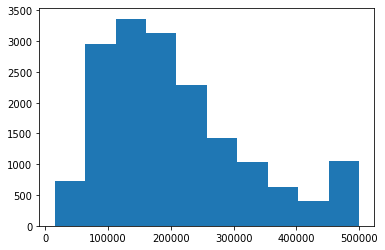

In [ ]:
plt.hist(df['median_house_value'])

上図の棒グラフ 1 つ 1 つの青い棒は、**ビン (bin)** と呼ばれ、それぞれの高さはある値の範囲に入っているサンプルの数を表します。
ヒストグラムでは値の範囲を複数指定し、それぞれの範囲に入っているサンプルの個数を描画します。
そのため、その値の範囲の指定を `bins` という引数を用いて行う必要があります。
ただし、この引数はオプショナルなもので、何も与えなかった場合はビンの数が自動的に決定されます。
この引数に整数を与えた場合は、`bins` 個のビンを値の範囲に対して等間隔に作成します。<br><br>
ようするに，**binsの値を変えることで，より細かな分布を分析することが出来ます．**

(array([  8.,  12.,  51., 214., 446., 559., 463., 658., 704., 574., 685.,
        588., 675., 670., 744., 799., 627., 684., 584., 433., 500., 547.,
        484., 406., 358., 370., 362., 267., 257., 166., 184., 197., 199.,
        216., 240., 159., 134., 126.,  98., 112.,  88.,  80.,  69.,  67.,
         91.,  50.,  42.,  44.,  42., 867.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        480600.92, 490300.96, 500001.  ]),
 <a list of 50 Patch ob

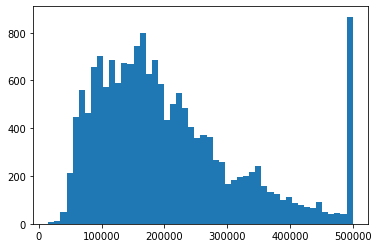

In [ ]:
# bins 引数に値を指定することで、ビンの数を指定できます
plt.hist(df['median_house_value'], bins=50)

上図から、`median_house_value` が 500,000 付近の値をとるサンプルが突出して多く存在していることが分かります。

## 箱ひげ図

**箱ひげ図 (box plot)** は、値のばらつきをわかりやすく表現するための図です。
`df.describe()` で確認できるような、いくつかの統計値をまとめて可視化するものです。
箱ひげ図は、**五数要約 （five-number summary）** と呼ばれる以下の統計量をまとめて表すものです。

- 最小値 (minimum)
- 第 1 四分位点 (lower quartile)
- 中央値 (median)
- 第 3 四分位点 (upper quartile)
- 最大値 (maximum)

描画には、
##`plt.boxplot()` 
を用います。

{'boxes': [<matplotlib.lines.Line2D at 0x7f8c08ea6d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f8c08eafe10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c08eb5e90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c08eb5950>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8c08eaf390>,
  <matplotlib.lines.Line2D at 0x7f8c08eaf8d0>]}

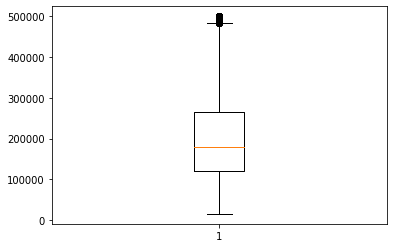

In [ ]:
plt.boxplot(df['median_house_value'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f8c08e1aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8c08e22b10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8c08e27b90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8c08e27650>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8c08e22090>,
  <matplotlib.lines.Line2D at 0x7f8c08e2db50>]}

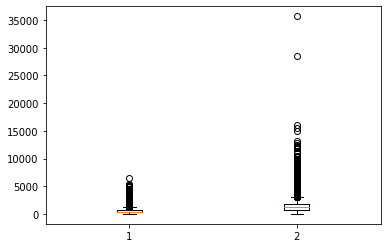

In [ ]:
# 複数指定する場合は、タプルを用います
plt.boxplot((df['total_bedrooms'], df['population']))

## 折れ線グラフ

折れ線グラフは、時系列データなどを表示する際に便利なグラフです。
`plt.plot()` を用いて描画します。

`plt.plot(y)` のように引数が 1 つの場合は、`y` の要素が縦軸の値に対応し、 横軸は要素のインデックスとなります。

それでは、NumPy を用いて作成したデータを、`plt.plot()` で表示してみましょう。

In [ ]:
import numpy as np

# [0,10]の間を100分割して数値を返す
x = np.linspace(0, 10, 100)

# x の値にランダムノイズを加える
y = x + np.random.randn(100)

In [ ]:
#xは100要素の入った1次元配列
x 

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [ ]:
#random.randn()は，「標準正規」分布から1つまたは複数のサンプルを返す．
np.random.randn(100)

array([ 7.11726360e-01,  1.26691001e+00,  1.94723767e+00, -1.90199744e+00,
       -1.37087479e+00, -1.57932705e+00, -1.17520514e+00,  2.16296066e+00,
       -5.16014286e-01,  1.35203734e+00, -5.40935411e-01, -1.22727446e-01,
       -6.90848583e-01, -3.99540729e-01,  5.46021110e-01,  1.21400022e+00,
       -8.41180688e-01, -7.04792444e-01, -4.40466182e-01,  4.55045969e-01,
        4.65235081e-01,  4.37257480e-01, -6.16316334e-01,  4.87377981e-01,
        5.14536927e-01, -1.01844053e-01,  1.13542776e+00, -2.87430083e-01,
        1.25653097e+00, -6.92980237e-01, -1.22099055e+00, -1.41474037e-01,
       -1.04407036e+00, -1.65041394e-01,  2.70171164e-01,  3.88092110e-01,
       -8.33792744e-01, -5.37590515e-01, -4.94017697e-04, -6.88178097e-01,
       -2.21713456e-01,  3.42721683e-01, -1.69780434e+00,  4.84428722e-01,
       -7.64080474e-01, -3.26179296e-01,  2.29086547e-01, -1.51600811e+00,
        6.58446131e-01,  4.42538817e-01,  5.41357199e-01, -1.47997326e+00,
       -2.80182480e-01,  

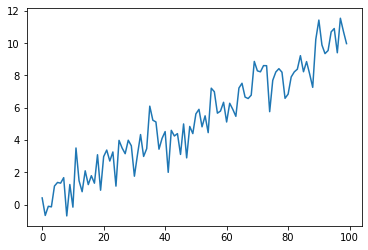

In [ ]:
plt.plot(y)

`plt.plot(x, y)` のように引数を 2 つ与える場合は、`x` が横軸、`y` が縦軸に対応します。

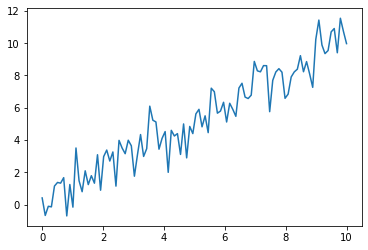

In [ ]:
plt.plot(x, y)

## グラフの調整

Matplotlib では横軸や縦軸に文字列でラベルを指定したり、グラフの大きさの調整、また直線・曲線・点の色や大きさ、文字の色や大きさの調整など、様々な見た目に関する設定を細かく指定することができます。

## seaborn

統計図の作成を簡単に行えるように Matplotlib をベースに作られたライブラリに [seaborn](https://seaborn.pydata.org/) というものがあります。

`seaborn` パッケージは、`sns` という別名で読み込まれるのが一般的です。

In [ ]:
import seaborn as sns

データの分布を確認する際は、**Matplotlib のヒストグラムよりも使い方がシンプルかつ見やすい**図を作成することができる
`sns.distplot()` 
がおすすめです。

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


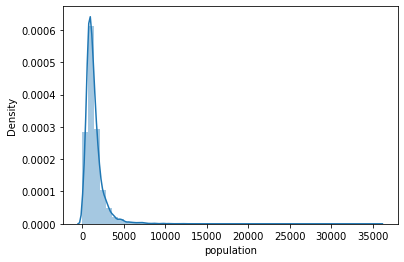

In [ ]:
sns.distplot(df['population'])

また、描画が完了するまで少し時間がかかってしまいますが、与えられたデータフレームオブジェクトの各列の全てのペアでの散布図をグリッド状に描画し、**様々な変数間の相関関係を視覚的に見渡すことができる** 
<br>`plt.pairplot()` 
も便利です。

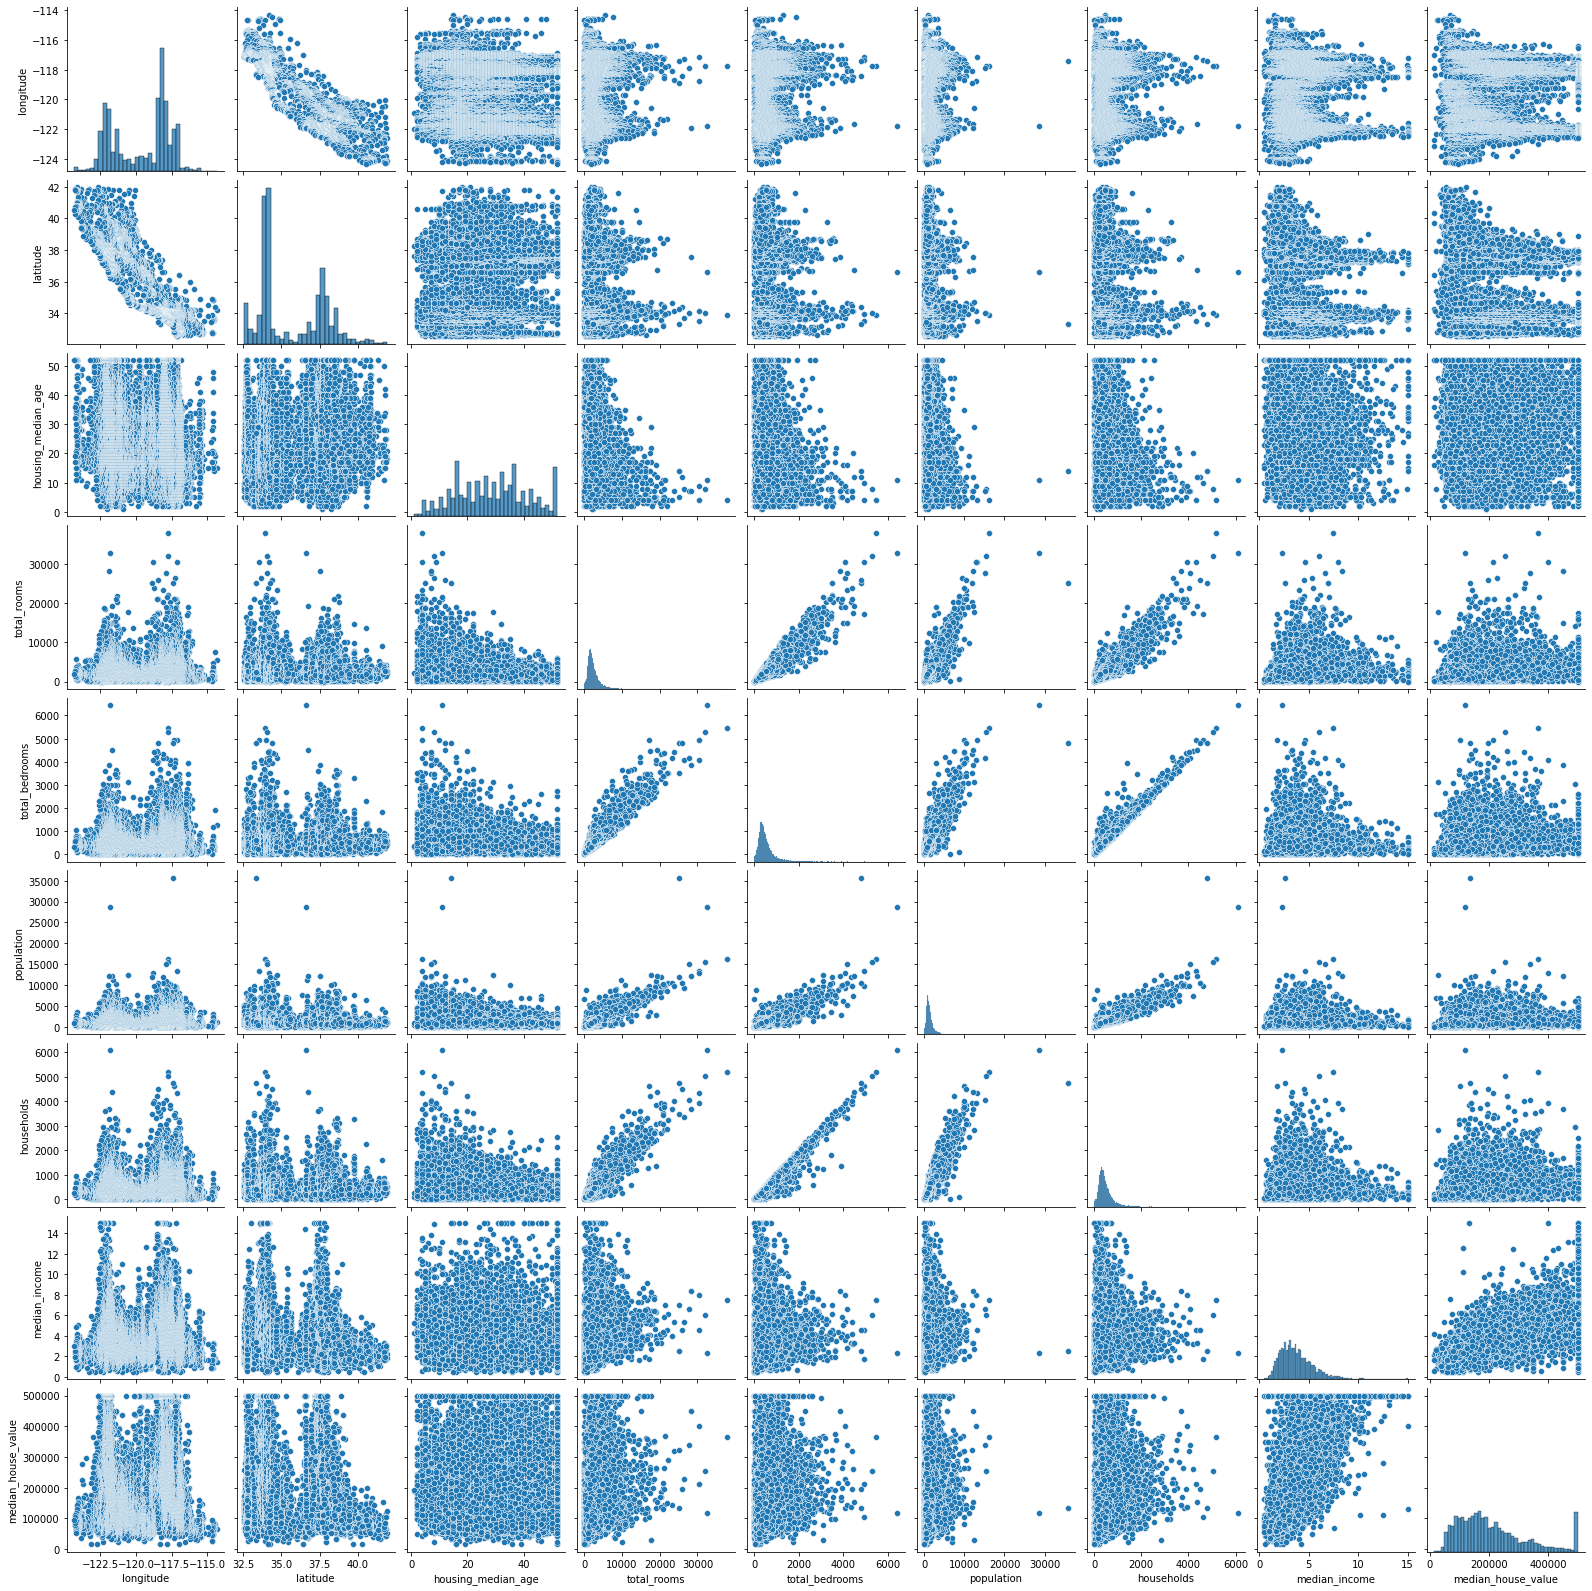

In [ ]:
sns.pairplot(df)

seaborn には他にも様々な種類のグラフを描画する機能があります。

# 早く知っておきたかったmatplotlibの基礎知識，あるいは見た目の調整が捗るArtistの話

# https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9#figure

## matplotlibにはグラフを作る際の２つの流儀がある<br>

In [ ]:
# [0,10]の間を100分割して数値を返す
x = np.linspace(0, 10, 100)

# x の値にランダムノイズを加える
y = x + np.random.randn(100)

**1.Pyplotインターフェース**(先程，折れ線グラフで書いたコード)<br>
**plt.なんとかで全部済ませる書き方**<br><br>
メリット：図のどこを操作するのかを明示的に指定しなくて良いので楽<br>
デメリット：グラフの微調整が出来ない

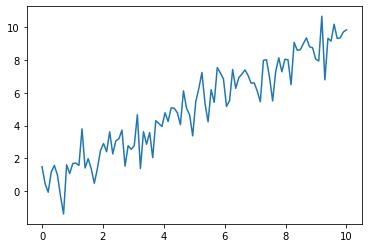

In [ ]:
plt.plot(x, y)

**2.オブジェクト指向インターフェース**<br>
**図のどこを操作，編集するのかを明示的にコードで指定する書き方**<br><br>
メリット：グラフの微調整がしやすい，複数のグラフを描ける<br>
デメリット：Pyplotインターフェースよりも作るのに時間がかかる

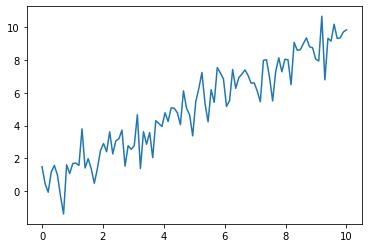

In [ ]:
fig, ax = plt.subplots() #figureオブジェクトとそれに属する1つのAxesオブジェクトを同時に作成
ax.plot(x,y)

このオブジェクト指向インターフェースを使うときは，図の操作，編集したい場所を
指定します，<br>そこで，matplotlibのグラフは**どういう要素で構成されていて，どういった名前がついているのか**を知る必要があります．

##matplotlibグラフの構成や名前について


グラフに表示されているものは全て**「Artist」**と呼ばれます．<br>
ex.データを示す線や点，x軸やy軸，描画領域を表す枠や文字など

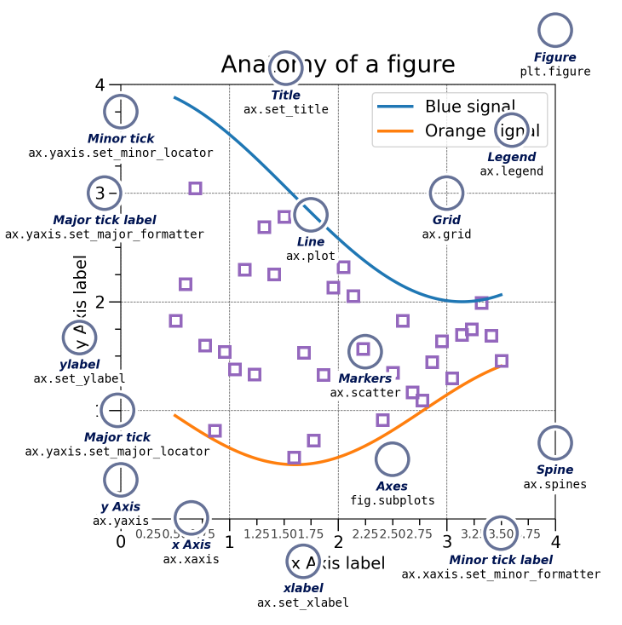<br>
図1：MatplotlibFigureのコンポーネント<br><br>
Artistは，**「container(容器)」**と**「primitive(原始的なものという意味)」**の2種類に分類されます．<br>

###primitive

Artistのうち，**プロットの線(Line2D)やプロットの点(PathCollection)あるいは文字(文字)，凡例(Legend)など**のこと．

### container
語弊があるかもしれませんが，一言でいうと，**containerは，primitiveを入れる箱**です．<br>イメージとしては，primitiveを描画するスケッチボードという感じです．<br>
また，**containerはFigure, Axes, Axis, Tickの4階層で構成**されています．

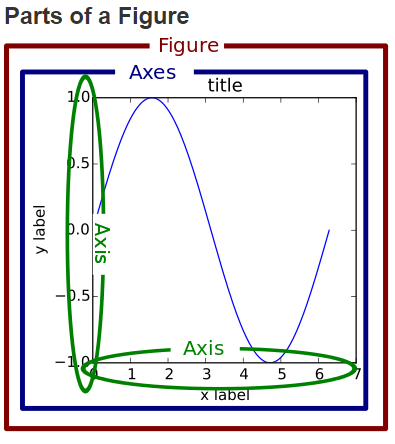
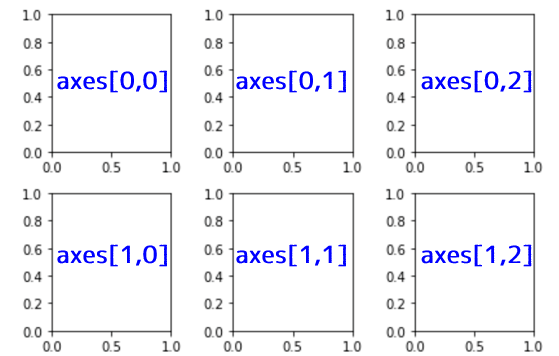<br>
・figureは，描画領域全体を表示する．グラフを描くスケッチボードみたいなイメージ<br>
・Axesは．グラフを描く領域全体を表示する．グラフ1つあたりのスケッチボード<br>
・Axisは，軸を表示する
<br><br>
ポイントは，<br>-FigureオブジェクトにAxesオブジェクトが属している<br>
-AxesオブジェクトにはAxisオブジェクトが属いている<br>
そのため，figureなしでAxesやAxisは書けないし，AxesなしでAxisは書けないです．

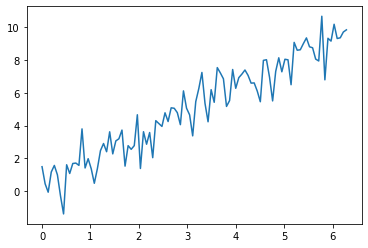

In [ ]:
#最初の紹介例
fig, ax = plt.subplots() #figureオブジェクトとそれに属する1つのAxesオブジェクトを同時に作成
ax.plot(x,y)

[]

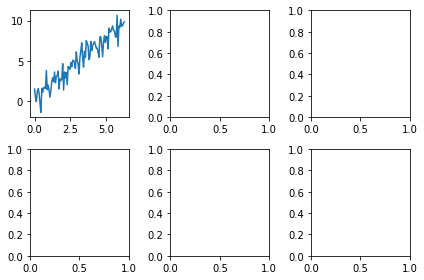

In [ ]:
fig, axes = plt.subplots(2, 3, tight_layout=True) #figureオブジェクトとそれに属する2×3のAxesオブジェクトを同時に作成．複数のAxesオブジェクトを作るため，axではなく，axesを使う．
axes[0,0].plot(x, y) #0行0列目のAxesオブジェクトにx,yをプロット
ax.plot()

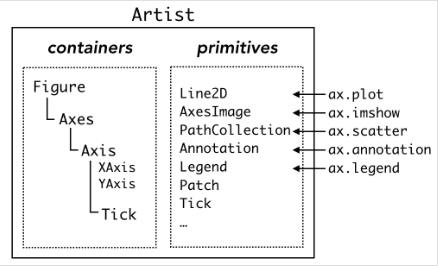<br>
図2：containerとprimitiveの関係を図示したもの

# 操作したいオブジェクトの指定方法
# **container名．属性名で指定**<br>
例えば．．．fig.patch，Axes.texts，Axis.label，Tick.tick1line<br>

自分が作りたいグラフに合わせた指定方法を探したいときは，解説記事，Matplotlib公式ドキュメントをご覧ください．そこには，細かな属性名と，それを指定することによって指定できるオブジェクトやprimitiveの一覧が書かれているので．きっと求める指定方法が書かれているはずです．<br>
matplotlib公式ドキュメント：https://matplotlib.org/stable/tutorials/index.html



**注意点**：属性名が同じでもcontainer名が異なると，指定するオブジェクト(primitive)は変わる．

今回は，個人的な偏見で，**機械学習において使えそう！**と思った指定方法についていくつかピックアップ

## `ax.lines`<br>
**Axes** containerの**Line2Dオブジェクト(primitive)**のリストを指定する


fig.text
Figure containerのTextオブジェクトのリストを指定する

## `fig.legends`
**Figure** containerの**Legendオブジェクトのリスト**を指定する


何もプロットされていない状態のax.linesの結果:
 []
sin(x)をプロット後のax.linesの結果:
cos(x)を追加プロット後のax.linesの結果:
 [<matplotlib.lines.Line2D object at 0x7f8bf0bc3ed0>, <matplotlib.lines.Line2D object at 0x7f8bf0533990>]

line1: Line2D(1st plot)
line2: Line2D(2nd plot)


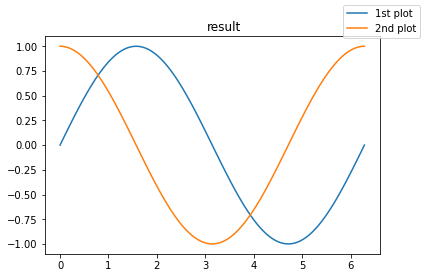

In [49]:
x = np.linspace(0, 2*np.pi, 100)

fig = plt.figure() #figureを作成
ax = fig.add_subplot(1,1,1) #Axesを作成
print('何もプロットされていない状態のax.linesの結果:\n', ax.lines) #Axis.linesは空リスト
line1, = ax.plot(x, np.sin(x), label='1st plot') # Axes.linesに「sin(x)」のLine2Dを追加+その他の設定
print('sin(x)をプロット後のax.linesの結果:\n', ax.lines)
line2, = ax.plot(x, np.cos(x), label='2nd plot') # Axes.linesに「cos(x)」のLine2Dを追加+その他の設定
print('cos(x)を追加プロット後のax.linesの結果:\n', ax.lines)

fig.text(0.5, 0.9, "result", fontsize=12) #x座標が0.5，y座標が0.9の個所にresultという文字列を表示
fig.legend() #凡例を表示
print('\nline1:', line1)
print('line2:', line2)